In [1]:
%matplotlib inline
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
import time

In [2]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp = pd.read_html(sp_url, header=0)[0]

In [3]:
symbols = [x for x in sp.Symbol if x.find(".")==-1]

In [4]:
df = yf.download(symbols, start="2020-01-01", end="2022-01-01")

[*********************100%***********************]  501 of 501 completed

1 Failed download:
- CEG: Data doesn't exist for startDate = 1577854800, endDate = 1641013200


In [71]:
from cig_subspace import cig_subspace
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
df_close = df['Adj Close']
df_close = df_close.dropna(axis=1)

In [261]:
df_close.index = pd.to_datetime(df_close.index)

In [265]:
df_train = df_close.loc['2020']
df_test = df_close.loc['2021']

In [278]:
log_df_close = np.log(df_close)
log_df_close

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACGL,ACN,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,4.435224,3.366706,5.023429,4.298122,4.355845,4.398283,5.128774,4.417710,3.770459,5.306061,...,4.958675,4.058919,4.085858,4.014927,4.344587,4.571916,4.954913,5.557369,3.870207,4.880366
2020-01-03,4.419038,3.315937,5.023492,4.288353,4.346307,4.385627,5.116915,4.405445,3.769307,5.304394,...,4.943731,4.063717,4.077787,4.003800,4.350456,4.568779,4.952295,5.545373,3.855995,4.880515
2020-01-06,4.421990,3.303930,5.006921,4.296290,4.354168,4.400162,5.187609,4.410670,3.773221,5.297843,...,4.941750,4.062280,4.085435,4.009291,4.343961,4.568190,4.946499,5.552998,3.843735,4.872808
2020-01-07,4.425050,3.300263,4.994988,4.291575,4.348447,4.392980,5.194899,4.405095,3.764914,5.276016,...,4.946484,4.060201,4.077218,4.014576,4.340195,4.569957,4.945620,5.547012,3.837646,4.876183
2020-01-08,4.434875,3.322785,4.983433,4.307534,4.355509,4.402623,5.185652,4.409164,3.754901,5.277976,...,4.952739,4.059240,4.062022,4.025064,4.343585,4.571721,4.957523,5.511976,3.847448,4.874009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,5.060884,2.899772,5.441089,5.189002,4.862674,4.869571,5.880058,4.935376,3.782597,6.015523,...,4.472553,4.181361,4.086455,4.012255,4.760214,4.908287,4.814576,6.407424,4.116128,5.500092
2021-12-28,5.063652,2.919931,5.447957,5.183218,4.862525,4.873053,5.878968,4.928353,3.790307,6.015379,...,4.459682,4.193263,4.083218,4.013684,4.770558,4.908070,4.817701,6.392453,4.117714,5.490882
2021-12-29,5.072844,2.893146,5.460062,5.183719,4.869717,4.880429,5.891202,4.933465,3.797734,6.015740,...,4.442416,4.198278,4.074426,4.024689,4.769219,4.912986,4.817857,6.398795,4.123087,5.502200


In [267]:
result = cig_subspace(df_train)

In [268]:
beta = result.beta
cig_pairs = result.cig_pairs
out = [item for t in cig_pairs.T for item in t]
mylist = list(dict.fromkeys(out))
mylist, len(mylist)

(['MTB',
  'RTX',
  'AEP',
  'PNW',
  'AMCR',
  'UNP',
  'DHR',
  'TMO',
  'BAC',
  'LVS',
  'AFL',
  'FIS',
  'MMC',
  'AME',
  'APH',
  'BKNG',
  'RHI',
  'KEY',
  'MAR',
  'DOV',
  'FTV',
  'IEX',
  'JPM',
  'EMR',
  'WTW',
  'RSG',
  'WM',
  'USB',
  'CPT',
  'MAA',
  'GOOG',
  'GOOGL',
  'CMS',
  'LNT',
  'PNC',
  'AEE',
  'HIG',
  'PRU',
  'TFC',
  'NWS',
  'NWSA',
  'FITB',
  'RF',
  'CFG',
  'COP',
  'XOM',
  'COF',
  'HBAN',
  'ES',
  'WEC',
  'JNJ',
  'PEP',
  'ESS',
  'UDR',
  'YUM',
  'PSX',
  'VLO',
  'IPG',
  'RJF',
  'MDLZ',
  'EXR',
  'PSA',
  'MA',
  'V',
  'MET',
  'PFG',
  'AVB'],
 67)

In [269]:
cig_pairs.index[0]

('MTB', 'RTX')

In [292]:
st = pd.DataFrame()
for i in range(len(cig_pairs)):
    y = log_df_close[cig_pairs.index[i][0]]
    x = log_df_close[cig_pairs.index[i][1]]
    b1 = result.summary.iloc[i, 1]
    s = (y - b1*x)/np.sqrt(1+b1*b1)
    s.name = cig_pairs.index[i]
    st = pd.concat([st, s], axis=1)
st

,"(MTB, RTX)","(AEP, PNW)","(AMCR, UNP)","(DHR, TMO)","(BAC, LVS)","(AFL, LVS)","(FIS, MMC)","(AME, APH)","(BKNG, RHI)","(KEY, MAR)",...,"(HBAN, KEY)","(PSX, VLO)","(IPG, RJF)","(MDLZ, PEP)","(EXR, PSA)","(MA, V)","(MET, PFG)","(AEE, ES)","(BAC, JPM)","(AVB, ESS)"
2020-01-02,-1.481223,0.508114,1.964464,1.993728,1.445983,0.691818,-0.202402,-1.182397,-3.878598,2.298514,...,0.477921,-0.070881,1.391775,1.638597,1.416427,-2.262573,0.284172,0.252991,2.213815,1.149557
2020-01-03,-1.487404,0.505243,1.951600,1.992936,1.433224,0.695137,-0.205486,-1.172591,-3.871799,2.282897,...,0.477863,-0.065717,1.398690,1.637648,1.425945,-2.259599,0.286266,0.256268,2.196727,1.151931
2020-01-06,-1.493307,0.508413,1.945370,1.992478,1.429732,0.689746,-0.199326,-1.167537,-3.864120,2.269309,...,0.473026,-0.070102,1.408312,1.634580,1.423632,-2.256499,0.283125,0.253323,2.195532,1.155567
2020-01-07,-1.496406,0.510195,1.937111,1.998803,1.423289,0.681442,-0.207420,-1.169384,-3.864474,2.263566,...,0.468292,-0.077501,1.406654,1.637104,1.421638,-2.255575,0.283903,0.261133,2.193312,1.144384
2020-01-08,-1.495271,0.509185,1.940393,1.999027,1.428699,0.678621,-0.195476,-1.170355,-3.865657,2.271809,...,0.469606,-0.106399,1.402314,1.637226,1.422471,-2.263341,0.288879,0.259302,2.201161,1.144542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-1.439586,0.617852,2.134390,2.359497,1.942786,1.158203,-0.709135,-1.415471,-4.473245,2.504133,...,0.458401,-0.193614,1.760590,1.727664,1.819745,-2.312211,0.250504,0.312688,2.433474,1.238814
2021-12-28,-1.445319,0.619776,2.138336,2.353069,1.946416,1.165639,-0.703406,-1.413878,-4.474141,2.508398,...,0.457017,-0.196497,1.755170,1.732380,1.820472,-2.313388,0.257505,0.313752,2.434034,1.236104
2021-12-29,-1.444278,0.621538,2.145504,2.357455,1.950066,1.176968,-0.704164,-1.418488,-4.479885,2.513237,...,0.454866,-0.208041,1.753959,1.735922,1.829006,-2.313275,0.258892,0.313777,2.432638,1.238949
2021-12-30,-1.446263,0.616607,2.146655,2.360849,1.942617,1.166146,-0.697942,-1.412508,-4.472241,2.509706,...,0.457551,-0.208191,1.757620,1.732878,1.829796,-2.312392,0.259256,0.311122,2.430586,1.239164


In [293]:
from statsmodels.tsa.api import VAR
model = VAR(st)
M = model.fit(maxlags=1).sample_acov(nlags=1)
M0 = M[0]
M1 = M[1]

/Users/danielwat/opt/anaconda3/envs/AQUMON/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [294]:
def variance(weights, M):
    return weights.T@M@weights

def portmanteou(weights, M):
    M0 = M[0]
    out = 0
    for m in M[1:]:
        v = variance(weights, m) / variance(weights, M0)
        out = out + v*v
    return out

In [351]:
from scipy.optimize import minimize

def minimize_port(M, target_variance = 0.03):
    n = M.shape[1]
    initialguess = np.repeat(1/n, n)
    bounds = ((-1.0,1.0),)*n
    weights_equal_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights)
    }
    vol_level = {
        'type': 'eq',
        'fun': lambda weights: variance(weights, M0) - target_variance**2
    }
    out = minimize(portmanteou,
                       initialguess,
                       args=(M,),
                       method = "SLSQP",
                       options = {'disp': False},
                       constraints = (weights_equal_1, vol_level),
                       bounds = bounds
                      )
    return out.x

In [307]:
st

,"(MTB, RTX)","(AEP, PNW)","(AMCR, UNP)","(DHR, TMO)","(BAC, LVS)","(AFL, LVS)","(FIS, MMC)","(AME, APH)","(BKNG, RHI)","(KEY, MAR)",...,"(HBAN, KEY)","(PSX, VLO)","(IPG, RJF)","(MDLZ, PEP)","(EXR, PSA)","(MA, V)","(MET, PFG)","(AEE, ES)","(BAC, JPM)","(AVB, ESS)"
2020-01-02,-1.481223,0.508114,1.964464,1.993728,1.445983,0.691818,-0.202402,-1.182397,-3.878598,2.298514,...,0.477921,-0.070881,1.391775,1.638597,1.416427,-2.262573,0.284172,0.252991,2.213815,1.149557
2020-01-03,-1.487404,0.505243,1.951600,1.992936,1.433224,0.695137,-0.205486,-1.172591,-3.871799,2.282897,...,0.477863,-0.065717,1.398690,1.637648,1.425945,-2.259599,0.286266,0.256268,2.196727,1.151931
2020-01-06,-1.493307,0.508413,1.945370,1.992478,1.429732,0.689746,-0.199326,-1.167537,-3.864120,2.269309,...,0.473026,-0.070102,1.408312,1.634580,1.423632,-2.256499,0.283125,0.253323,2.195532,1.155567
2020-01-07,-1.496406,0.510195,1.937111,1.998803,1.423289,0.681442,-0.207420,-1.169384,-3.864474,2.263566,...,0.468292,-0.077501,1.406654,1.637104,1.421638,-2.255575,0.283903,0.261133,2.193312,1.144384
2020-01-08,-1.495271,0.509185,1.940393,1.999027,1.428699,0.678621,-0.195476,-1.170355,-3.865657,2.271809,...,0.469606,-0.106399,1.402314,1.637226,1.422471,-2.263341,0.288879,0.259302,2.201161,1.144542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-1.439586,0.617852,2.134390,2.359497,1.942786,1.158203,-0.709135,-1.415471,-4.473245,2.504133,...,0.458401,-0.193614,1.760590,1.727664,1.819745,-2.312211,0.250504,0.312688,2.433474,1.238814
2021-12-28,-1.445319,0.619776,2.138336,2.353069,1.946416,1.165639,-0.703406,-1.413878,-4.474141,2.508398,...,0.457017,-0.196497,1.755170,1.732380,1.820472,-2.313388,0.257505,0.313752,2.434034,1.236104
2021-12-29,-1.444278,0.621538,2.145504,2.357455,1.950066,1.176968,-0.704164,-1.418488,-4.479885,2.513237,...,0.454866,-0.208041,1.753959,1.735922,1.829006,-2.313275,0.258892,0.313777,2.432638,1.238949
2021-12-30,-1.446263,0.616607,2.146655,2.360849,1.942617,1.166146,-0.697942,-1.412508,-4.472241,2.509706,...,0.457551,-0.208191,1.757620,1.732878,1.829796,-2.312392,0.259256,0.311122,2.430586,1.239164


In [352]:
weights = minimize_port(M)

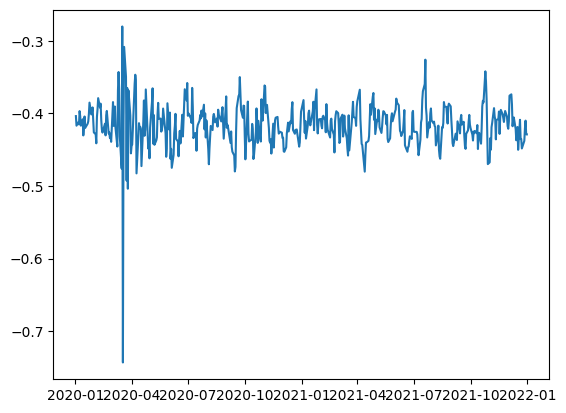

In [353]:
plt.plot((weights * st).sum(axis=1))

In [387]:
port_test = (weights*st).sum(axis=1)

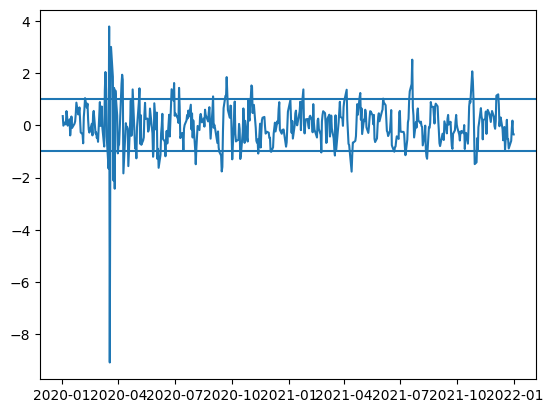

In [392]:
plt.plot((port_test - port_test.loc['2020'].mean()) / port_test.loc['2020'].std())
plt.axhline(1)
plt.axhline(-1)

In [314]:
st

,"(MTB, RTX)","(AEP, PNW)","(AMCR, UNP)","(DHR, TMO)","(BAC, LVS)","(AFL, LVS)","(FIS, MMC)","(AME, APH)","(BKNG, RHI)","(KEY, MAR)",...,"(HBAN, KEY)","(PSX, VLO)","(IPG, RJF)","(MDLZ, PEP)","(EXR, PSA)","(MA, V)","(MET, PFG)","(AEE, ES)","(BAC, JPM)","(AVB, ESS)"
2020-01-02,-1.481223,0.508114,1.964464,1.993728,1.445983,0.691818,-0.202402,-1.182397,-3.878598,2.298514,...,0.477921,-0.070881,1.391775,1.638597,1.416427,-2.262573,0.284172,0.252991,2.213815,1.149557
2020-01-03,-1.487404,0.505243,1.951600,1.992936,1.433224,0.695137,-0.205486,-1.172591,-3.871799,2.282897,...,0.477863,-0.065717,1.398690,1.637648,1.425945,-2.259599,0.286266,0.256268,2.196727,1.151931
2020-01-06,-1.493307,0.508413,1.945370,1.992478,1.429732,0.689746,-0.199326,-1.167537,-3.864120,2.269309,...,0.473026,-0.070102,1.408312,1.634580,1.423632,-2.256499,0.283125,0.253323,2.195532,1.155567
2020-01-07,-1.496406,0.510195,1.937111,1.998803,1.423289,0.681442,-0.207420,-1.169384,-3.864474,2.263566,...,0.468292,-0.077501,1.406654,1.637104,1.421638,-2.255575,0.283903,0.261133,2.193312,1.144384
2020-01-08,-1.495271,0.509185,1.940393,1.999027,1.428699,0.678621,-0.195476,-1.170355,-3.865657,2.271809,...,0.469606,-0.106399,1.402314,1.637226,1.422471,-2.263341,0.288879,0.259302,2.201161,1.144542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,-1.439586,0.617852,2.134390,2.359497,1.942786,1.158203,-0.709135,-1.415471,-4.473245,2.504133,...,0.458401,-0.193614,1.760590,1.727664,1.819745,-2.312211,0.250504,0.312688,2.433474,1.238814
2021-12-28,-1.445319,0.619776,2.138336,2.353069,1.946416,1.165639,-0.703406,-1.413878,-4.474141,2.508398,...,0.457017,-0.196497,1.755170,1.732380,1.820472,-2.313388,0.257505,0.313752,2.434034,1.236104
2021-12-29,-1.444278,0.621538,2.145504,2.357455,1.950066,1.176968,-0.704164,-1.418488,-4.479885,2.513237,...,0.454866,-0.208041,1.753959,1.735922,1.829006,-2.313275,0.258892,0.313777,2.432638,1.238949
2021-12-30,-1.446263,0.616607,2.146655,2.360849,1.942617,1.166146,-0.697942,-1.412508,-4.472241,2.509706,...,0.457551,-0.208191,1.757620,1.732878,1.829796,-2.312392,0.259256,0.311122,2.430586,1.239164


In [325]:
beta1 = beta.loc[st.columns]["B1"]
beta1

(MTB, RTX)        1.805545
(AEP, PNW)        0.864236
(AMCR, UNP)       0.053062
(DHR, TMO)        0.487104
(BAC, LVS)        0.453527
(AFL, LVS)        0.718708
(FIS, MMC)        1.114405
(AME, APH)        1.758612
(BKNG, RHI)      35.506998
(KEY, MAR)        0.115535
(AFL, BAC)        1.580137
(DOV, FTV)        1.688717
(IEX, UNP)        0.897771
(AFL, JPM)        0.393231
(EMR, RHI)        1.334633
(MMC, WTW)        0.657157
(RSG, WM)         0.882189
(KEY, USB)        0.410607
(CPT, MAA)        0.881635
(GOOG, GOOGL)     1.004595
(CMS, LNT)        0.977399
(JPM, PNC)        0.792140
(AEE, CMS)        1.331298
(HIG, RTX)        0.606052
(PRU, TFC)        1.694585
(NWS, NWSA)       0.989097
(FITB, TFC)       0.616929
(FITB, RF)        1.820531
(CFG, FITB)       1.367126
(COP, XOM)        1.114140
(COF, FITB)       3.778422
(CFG, HBAN)       3.152687
(ES, WEC)         0.923025
(JNJ, PEP)        0.915356
(ESS, UDR)        7.075793
(DOV, YUM)        1.301849
(HBAN, KEY)       0.689185
(

In [327]:
out = [item for t in beta1.index for item in t]
mylist = list(dict.fromkeys(out))
mylist, len(mylist)

(['MTB',
  'RTX',
  'AEP',
  'PNW',
  'AMCR',
  'UNP',
  'DHR',
  'TMO',
  'BAC',
  'LVS',
  'AFL',
  'FIS',
  'MMC',
  'AME',
  'APH',
  'BKNG',
  'RHI',
  'KEY',
  'MAR',
  'DOV',
  'FTV',
  'IEX',
  'JPM',
  'EMR',
  'WTW',
  'RSG',
  'WM',
  'USB',
  'CPT',
  'MAA',
  'GOOG',
  'GOOGL',
  'CMS',
  'LNT',
  'PNC',
  'AEE',
  'HIG',
  'PRU',
  'TFC',
  'NWS',
  'NWSA',
  'FITB',
  'RF',
  'CFG',
  'COP',
  'XOM',
  'COF',
  'HBAN',
  'ES',
  'WEC',
  'JNJ',
  'PEP',
  'ESS',
  'UDR',
  'YUM',
  'PSX',
  'VLO',
  'IPG',
  'RJF',
  'MDLZ',
  'EXR',
  'PSA',
  'MA',
  'V',
  'MET',
  'PFG',
  'AVB'],
 67)

In [355]:
weights[weights >0].sum()

10.580165697020325

In [477]:
long = pd.DataFrame([weights], columns=beta1.index).T
short = - beta1*weights
long.index = [seq[0] for seq in long.index]
short.index = [seq[1] for seq in short.index]
pd.concat([long, short])

,0
MTB,0.215912
AEP,-0.235607
AMCR,-0.169501
DHR,-0.426903
BAC,-0.025223
...,...
V,2.091225
PFG,-0.345006
ES,-0.730335
JPM,0.017713


In [480]:
#make sure the beta and weights'
def positioning(beta, weights, NAV=1):

    long = pd.DataFrame([weights], columns=beta.index).T
    short = -beta*weights
    long.index = [seq[0] for seq in long.index]
    short.index = [seq[1] for seq in short.index]

    return pd.concat([long, short]).sum(level=0)

In [481]:
positioning(beta1, weights)

/var/folders/f7/pjv0s2vx0kdf83kvq68gsbkw0000gn/T/ipykernel_70181/2270045647.py:9: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  return pd.concat([long, short]).sum(level=0)


,0
MTB,0.215912
AEP,-0.235607
AMCR,-0.169501
DHR,-0.426903
BAC,-0.819535
...,...
VLO,0.413470
RJF,0.232000
PSA,0.317971
V,2.091225
